In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Carregando o dataset

In [2]:
df_train = pd.read_csv('clean_data/train.csv', sep=';')
df_val = pd.read_csv('clean_data/val.csv', sep=';')
df_test = pd.read_csv('clean_data/test.csv', sep=';')

In [3]:
df_train.columns

Index(['book_text_reviews_count', 'language_code', 'is_ebook', 'book_rating',
       'book_format', 'author_id', 'num_pages', 'publication_year', 'book_id',
       'book_ratings_count', 'book_title', 'book_genre', 'author_rating',
       'author_reviews_count', 'author_name', 'author_ratings_count',
       'user_id', 'is_read', 'rating', 'is_reviewed'],
      dtype='object')

### Análise exploratória dos dados

Para a análise exploratória dos dados vamos criar um novo dataset no qual cada livro só vai aparecer uma vez, para assim ser possível identificar dados dos livros separadamente das avaliações de cada usuário.

In [4]:
df_books = df_train.drop_duplicates(subset='book_id', keep=False)

#### Gêneros dos livros

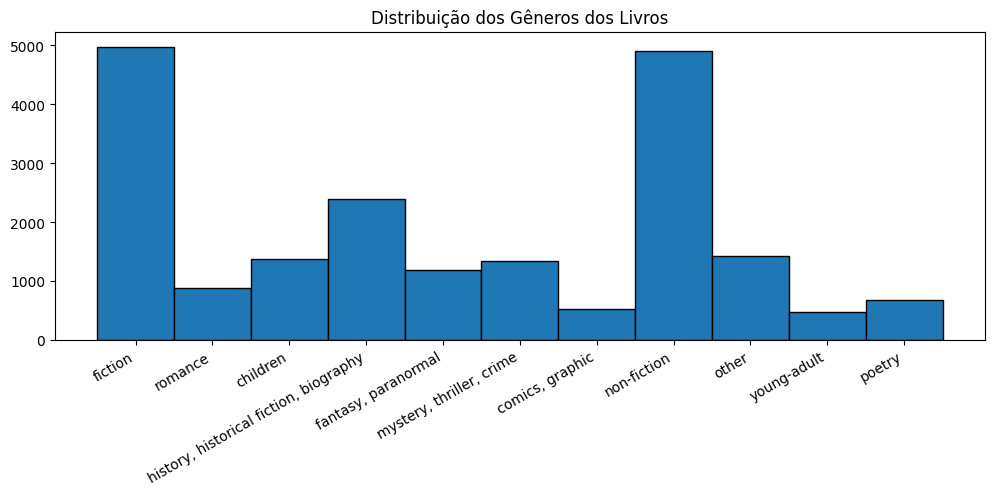

In [5]:
plt.figure(figsize=(12, 4))

_, bins, _ = plt.hist(df_books['book_genre'], bins=df_books['book_genre'].nunique(dropna=False), edgecolor='black', align='mid')
plt.title('Distribuição dos Gêneros dos Livros')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, rotation=30, ha='right')

plt.show()

Ao analisar a distribuição dos gêneros dos livros, pode-se perceber que os gêneros mais presentes são "ficção", "história, ficção histórica, biografia" e "não-ficção". Logo é interessante agrupar os outros gêneros menos comuns a fim de diminuir a complexidade do modelo que será criado.

In [6]:
# Agrupamento dos gêneros menos presentes na categoria "other"
df_train['book_genre'] = df_train['book_genre'].apply(
    lambda x: x if x in ['fiction', 'non-fiction', 'history, historical fiction, biography'] else 'other'
)
df_val['book_genre'] = df_val['book_genre'].apply(
    lambda x: x if x in ['fiction', 'non-fiction', 'history, historical fiction, biography'] else 'other'
)
df_test['book_genre'] = df_test['book_genre'].apply(
    lambda x: x if x in ['fiction', 'non-fiction', 'history, historical fiction, biography'] else 'other'
)

Distribuição após o agrupamento

In [7]:
df_books = df_train.drop_duplicates(subset='book_id', keep=False)

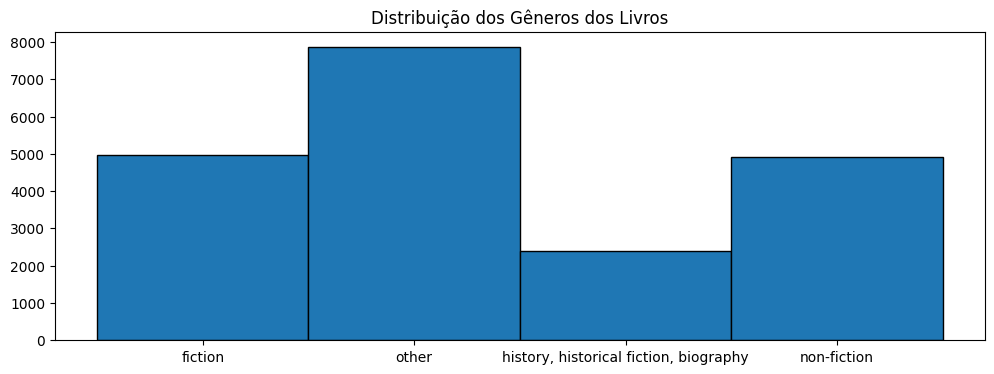

In [8]:
plt.figure(figsize=(12, 4))

_, bins, _ = plt.hist(df_books['book_genre'], bins=df_books['book_genre'].nunique(dropna=False), edgecolor='black', align='mid')
plt.title('Distribuição dos Gêneros dos Livros')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, ha='center')

plt.show()

#### Idiomas dos livros

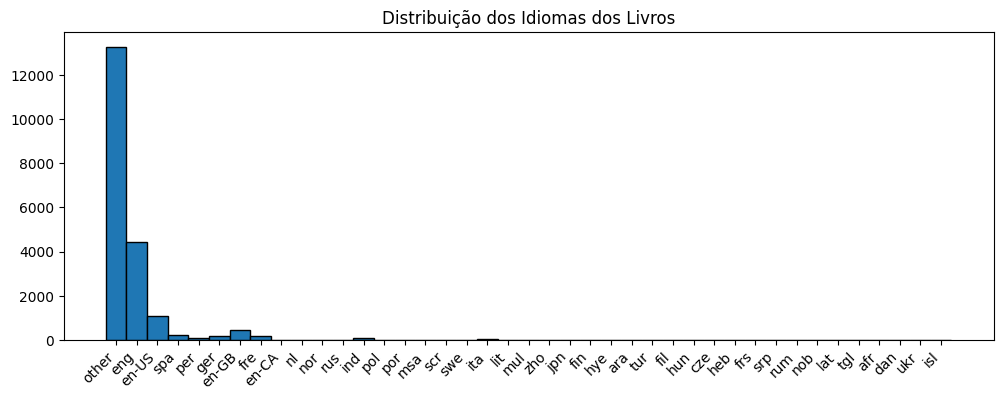

In [9]:
plt.figure(figsize=(12, 4))

_, bins, _ = plt.hist(df_books['language_code'], bins=df_books['language_code'].nunique(dropna=False), edgecolor='black', align='mid')
plt.title('Distribuição dos Idiomas dos Livros')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, rotation=45, ha='right')

plt.show()

Ao analisar a distribuição de linguagens dos livros, é perceptível que a lingua inglesa ('eng', 'en-US', 'en-GB', 'en-CA') é a mais frequente, portanto todas essas linguas inglesas serão agrupadas em uma mesma categoria, e as demais linguas serão agrupadas na categoria "other".

In [10]:
# Agrupamento das linguas inglesas e das demais linguas
df_train['language_code'] = df_train['language_code'].apply(
    lambda x: 'eng' if x in ['eng', 'en-US', 'en-GB', 'en-CA'] else 'other'
)
df_val['language_code'] = df_val['language_code'].apply(
    lambda x: 'eng' if x in ['eng', 'en-US', 'en-GB', 'en-CA'] else 'other'
)
df_test['language_code'] = df_test['language_code'].apply(
    lambda x: 'eng' if x in ['eng', 'en-US', 'en-GB', 'en-CA'] else 'other'
)

Distribuição após o agrupamento

In [11]:
df_books = df_train.drop_duplicates(subset='book_id', keep=False)

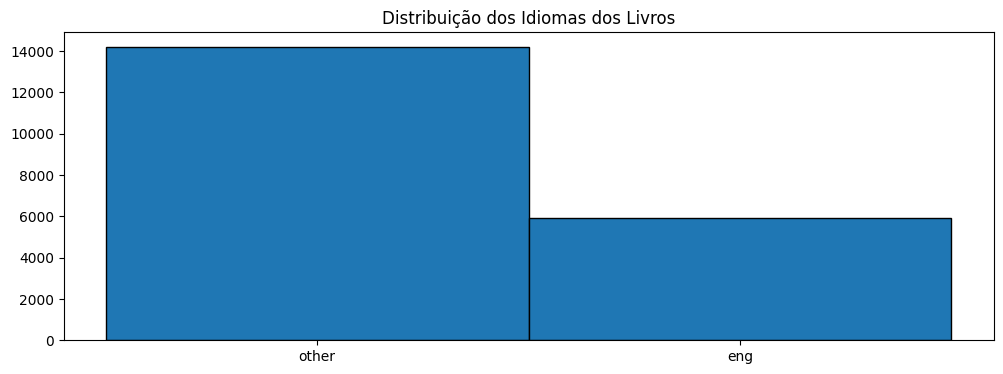

In [12]:
plt.figure(figsize=(12, 4))

_, bins, _ = plt.hist(df_books['language_code'], bins=df_books['language_code'].nunique(dropna=False), edgecolor='black', align='mid')
plt.title('Distribuição dos Idiomas dos Livros')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, ha='center')

plt.show()

#### Formato dos livros

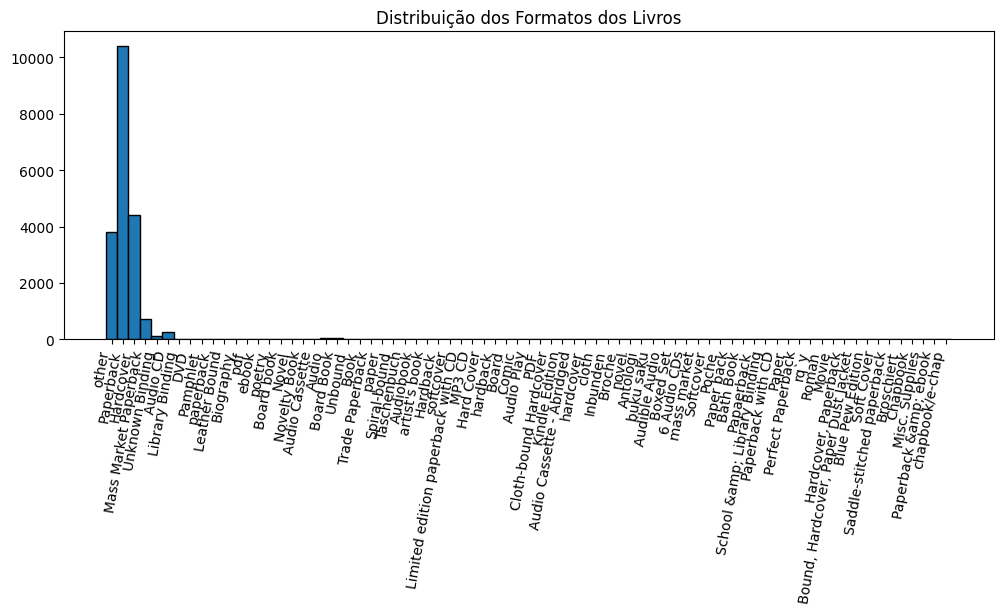

In [13]:
plt.figure(figsize=(12, 4))

_, bins, _ = plt.hist(df_books['book_format'], bins=df_books['book_format'].nunique(dropna=False), edgecolor='black', align='mid')
plt.title('Distribuição dos Formatos dos Livros')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, rotation=80, ha='right')

plt.show()

Ao analisar a distribuição dos formatos dos livros nota-se que livros de em "papel" são os mais frequentes, seguidos por livro de "capa dura" e por "outros". Portanto apenas essas 3 categorias serão mantidas, e todas as demais categorias serão agrupadas em "other".

In [14]:
# Agrupamento de todas as categorias em "other"
df_train['book_format'] = df_train['book_format'].apply(
    lambda x: x if x in ['Paperback', 'Hardcover'] else 'other'
)
df_val['book_format'] = df_val['book_format'].apply(
    lambda x: x if x in ['Paperback', 'Hardcover'] else 'other'
)
df_test['book_format'] = df_test['book_format'].apply(
    lambda x: x if x in ['Paperback', 'Hardcover'] else 'other'
)

Distribuição após o agrupamento

In [15]:
df_books = df_train.drop_duplicates(subset='book_id', keep=False)

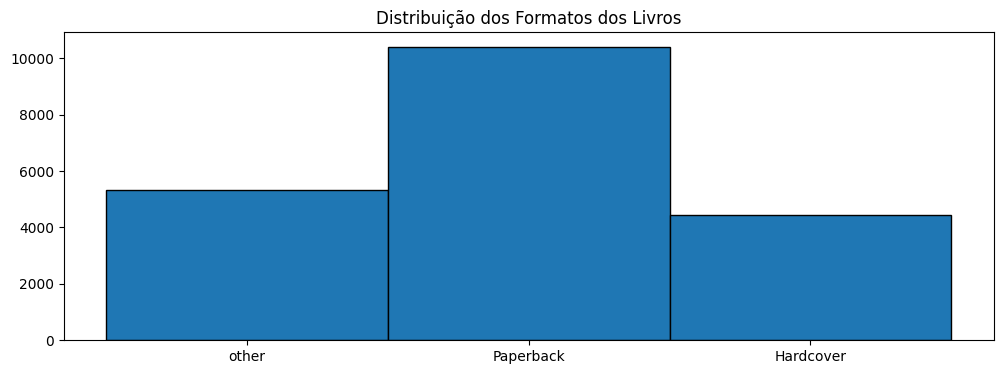

In [16]:
plt.figure(figsize=(12, 4))

_, bins, _ = plt.hist(df_books['book_format'], bins=df_books['book_format'].nunique(dropna=False), edgecolor='black', align='mid')
plt.title('Distribuição dos Formatos dos Livros')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, ha='center')

plt.show()

#### Autores

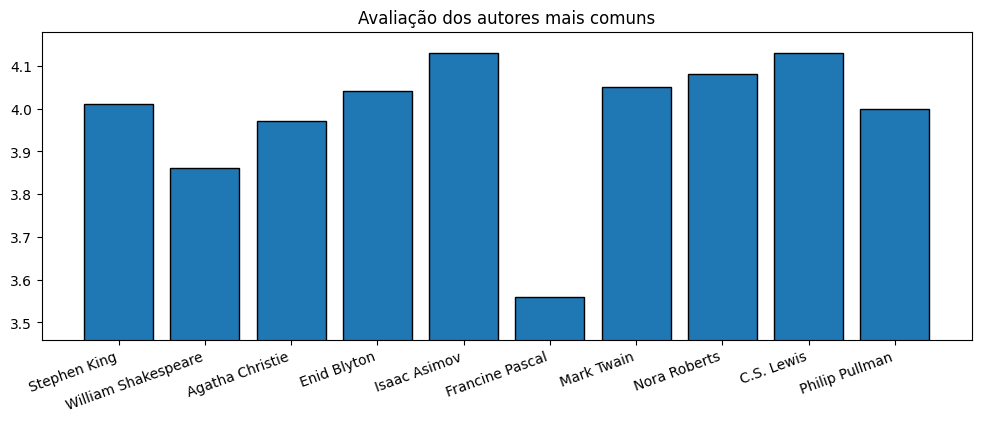

In [17]:
# Autores com maior quantidade de livros
df_common_authors = df_books['author_name'].value_counts().reset_index()
df_common_authors.columns = ['author_name', 'count']
df_common_authors = df_common_authors.nlargest(10, 'count')

df_common_authors = df_common_authors.merge(
    df_books[['author_name', 'author_rating']],
    on='author_name',
    how='left'
).drop_duplicates(subset='author_name')

# Plot
plt.figure(figsize=(12, 4))
plt.bar(df_common_authors['author_name'], df_common_authors['author_rating'], edgecolor='black')

plt.title('Avaliação dos autores mais comuns')
plt.ylim(df_common_authors['author_rating'].min() - 0.1, df_common_authors['author_rating'].max() + 0.05)
plt.xticks(rotation=20, ha='right')

plt.show()

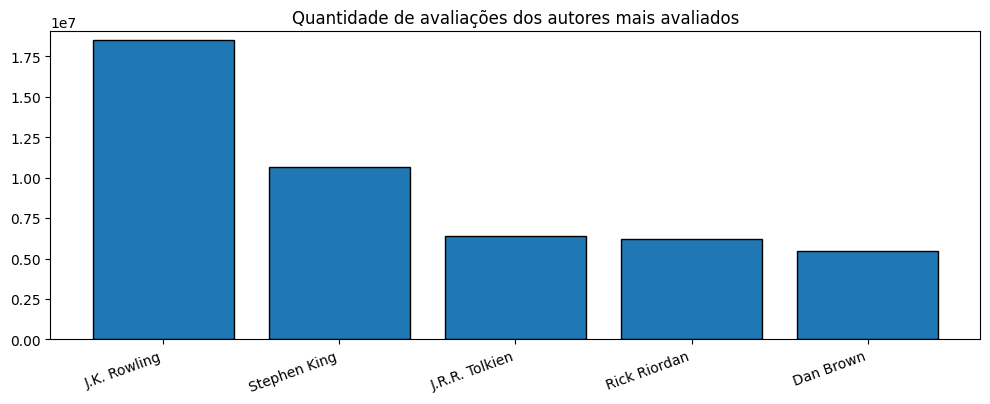

In [18]:
# Autores com maior número de avaliações
df_common_authors = df_books[['author_name', 'author_ratings_count']].drop_duplicates(subset='author_name')
df_common_authors = df_common_authors.nlargest(5, 'author_ratings_count')

# Plot
plt.figure(figsize=(12, 4))
plt.bar(df_common_authors['author_name'], df_common_authors['author_ratings_count'], edgecolor='black')

plt.title('Quantidade de avaliações dos autores mais avaliados')
plt.ylim(0, df_common_authors['author_ratings_count'].max() + 500000)
plt.xticks(rotation=20, ha='right')

plt.show()

#### Livros

In [19]:
# Livros melhores avaliados que possuem mais de 1000 avaliações
df_common_books = df_books[
    ['book_title', 'book_rating', 'book_ratings_count', 'author_name', 'book_genre']
].drop_duplicates(subset='book_title')

df_common_books = df_common_books[df_common_books['book_ratings_count'] > 1000]
df_common_books = df_common_books.nlargest(5, 'book_rating')

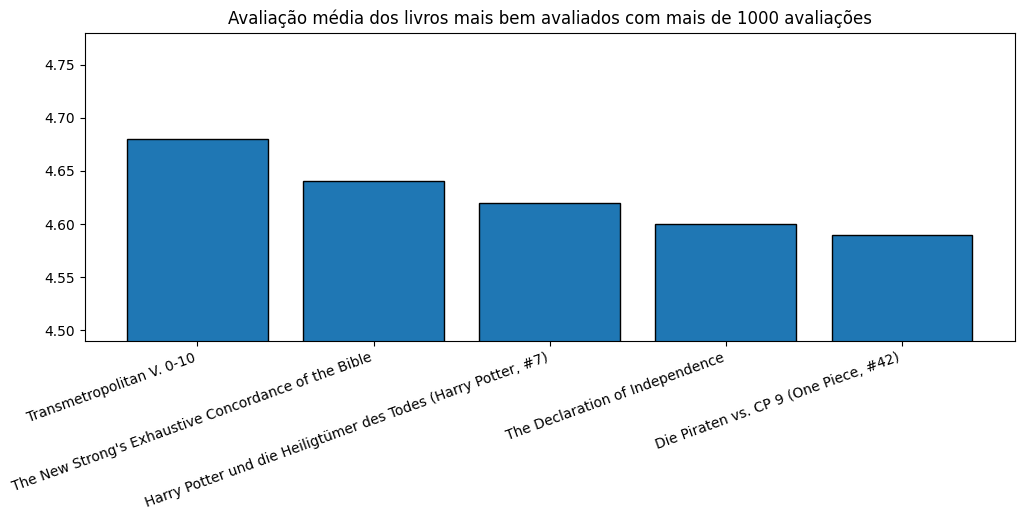

In [20]:
# Plot das avaliações dos 5 livros melhores avaliados
plt.figure(figsize=(12, 4))
plt.bar(df_common_books['book_title'], df_common_books['book_rating'], edgecolor='black')

plt.title('Avaliação média dos livros mais bem avaliados com mais de 1000 avaliações')
plt.ylim(df_common_books['book_rating'].min() - 0.1, df_common_books['book_rating'].max() + 0.1)
plt.xticks(rotation=20, ha='right')

plt.show()

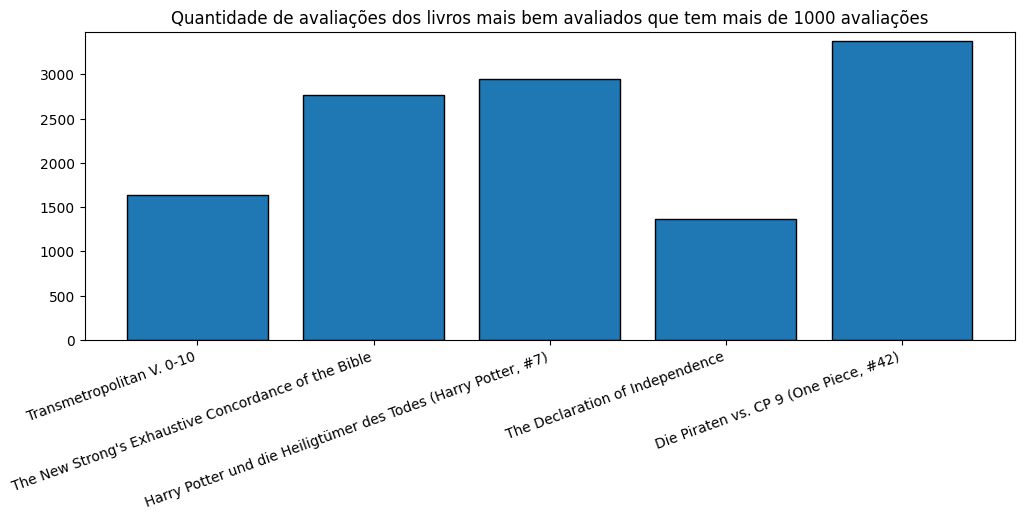

In [21]:
# Plot da quantidade de avaliações dos 5 livros melhores avaliados
plt.figure(figsize=(12, 4))
plt.bar(df_common_books['book_title'], df_common_books['book_ratings_count'], edgecolor='black')

plt.title('Quantidade de avaliações dos livros mais bem avaliados que tem mais de 1000 avaliações')
plt.ylim(0, df_common_books['book_ratings_count'].max() + 100)
plt.xticks(rotation=20, ha='right')

plt.show()

In [22]:
# Autor, Gênero e Avaliação dos 5 livros melhores avaliados
df_common_books[['book_title', 'book_genre', 'author_name', 'book_rating']]

,book_title,book_genre,author_name,book_rating
416557,Transmetropolitan V. 0-10,other,Warren Ellis,4.68
173664,The New Strong's Exhaustive Concordance of the...,non-fiction,James Strong,4.64
926909,Harry Potter und die Heiligtümer des Todes (Ha...,other,J.K. Rowling,4.62
979254,The Declaration of Independence,"history, historical fiction, biography",Thomas Jefferson,4.60
271574,"Die Piraten vs. CP 9 (One Piece, #42)",other,Eiichiro Oda,4.59


#### Avaliações dos usuários

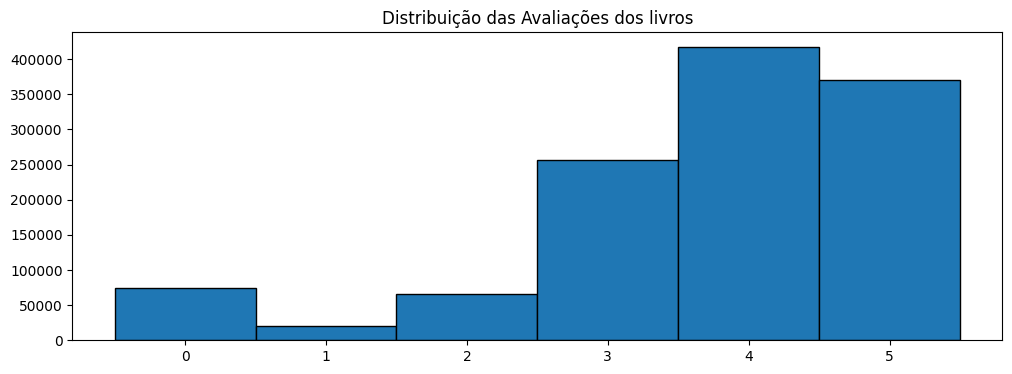

In [23]:
plt.figure(figsize=(12, 4))

plt.hist(df_train['rating'], bins=np.arange(-0.5, 6.5, 1), edgecolor='black', align='mid')
plt.title('Distribuição das Avaliações dos livros')

plt.xticks([0, 1, 2, 3, 4, 5], rotation=0, ha='center')

plt.show()

Ao analisar a distribuição das avaliações, percebe-se um desbalanceamento significativo, o que pode impactar negativamente no desempenho do modelo que será criado. A presença de uma distribuição desigual da variável alvo pode levar a um viés durante a aprendizagem, resultando em um modelo menos eficiente e menos preciso, portanto é essencial realizar o balanceamento desses dados.

É importante destacar que esse balanceamento deve ser feito **apenas no conjunto de treinamento**, visto que o conjunto de testes deve refletir uma situação no mundo real, manter a distribuição original nos dados de teste garante que o modelo seja avaliado em um cenário realista, semelhante ao que foi observado na análise inicial.

In [24]:
def random_oversampling(num_samples : int, df : pd.DataFrame) -> pd.DataFrame:
    """
    Perform random oversampling to increase the number of samples in a DataFrame.

    Parameters:
    num_samples: The desired number of samples in the output DataFrame.
        It must be greater than or equal to the number of rows in `df`.
    df: The input DataFrame to be oversampled.

    Returns:
    A DataFrame containing the original data and the new randomly sampled rows, with a total number of rows equal to `num_samples`.
    """

    num_new_samples = num_samples - df.shape[0]

    df_samples = df.sample(n=num_new_samples, replace=True)
    df = pd.concat([df, df_samples], ignore_index=False)
    df = df.sample(frac=1, replace=False).reset_index(drop=True)
    
    return df

In [25]:
df_train_classes = []
df_train_classes.append(df_train[df_train['rating'] == 0])
df_train_classes.append(df_train[df_train['rating'] == 1])
df_train_classes.append(df_train[df_train['rating'] == 2])
df_train_classes.append(df_train[df_train['rating'] == 3])
df_train_classes.append(df_train[df_train['rating'] == 4])
df_train_classes.append(df_train[df_train['rating'] == 5])

In [26]:
num_samples = max(df.shape[0] for df in df_train_classes)

for i, df in enumerate(df_train_classes):
    df_train_classes[i] = random_oversampling(num_samples, df)

In [27]:
df_train = pd.concat(df_train_classes, ignore_index=True)
df_train = df_train.sample(frac=1, replace=False).reset_index(drop=True)

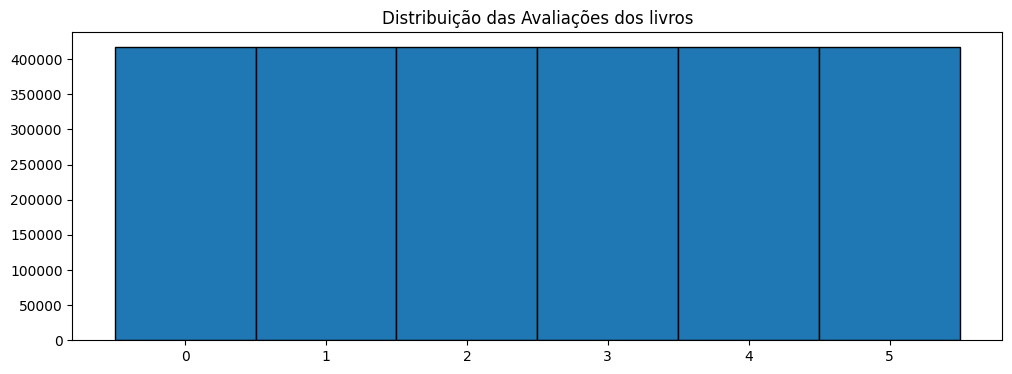

In [28]:
plt.figure(figsize=(12, 4))

plt.hist(df_train['rating'], bins=np.arange(-0.5, 6.5, 1), edgecolor='black', align='mid')
plt.title('Distribuição das Avaliações dos livros')

plt.xticks([0, 1, 2, 3, 4, 5], rotation=0, ha='center')

plt.show()

### Salvando as alterações feitas no dataset

In [29]:
df_train.to_csv('clean_data/train.csv', index=False, sep=';', encoding='utf-8', header=True)
df_val.to_csv('clean_data/val.csv', index=False, sep=';', encoding='utf-8', header=True)
df_test.to_csv('clean_data/test.csv', index=False, sep=';', encoding='utf-8', header=True)